<a href="https://colab.research.google.com/github/Atharva-D/Moodify/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading Dataset**

#**Unzipping the dataset**

#**Importing necessary libraries**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#**Training Data**

In [24]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= r"C:\Users\lohit ramaraju\OneDrive\Desktop\IITJ\AI\Project\DataSet\Dataset\train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 32298 images belonging to 7 classes.


{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happiness': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

#**Testing Data**

In [25]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= r"C:\Users\lohit ramaraju\OneDrive\Desktop\IITJ\AI\Project\DataSet\Dataset\test", 
                                           target_size=(224,224), 
                                           batch_size=32)
val_data.class_indices

Found 3589 images belonging to 7 classes.


{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happiness': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

# **Visualize the images in the training data**

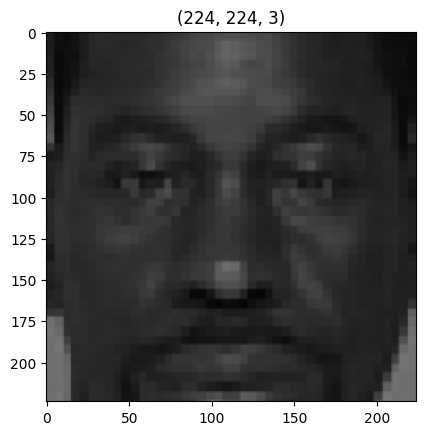

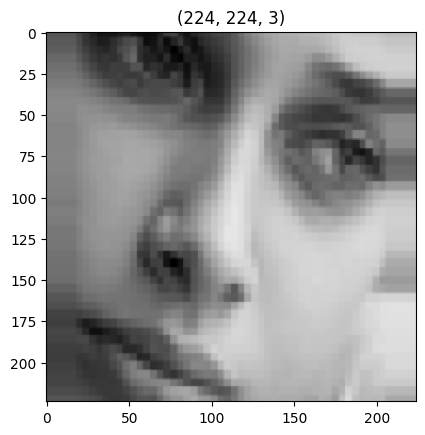

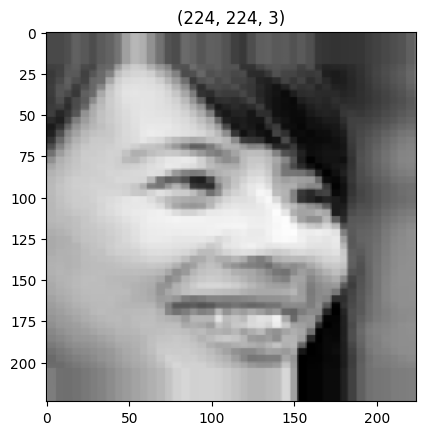

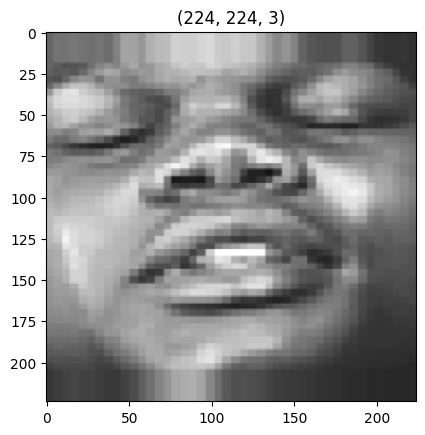

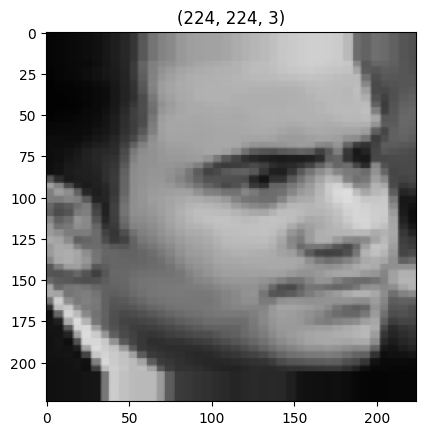

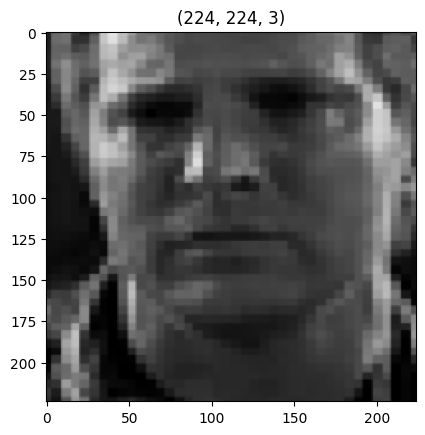

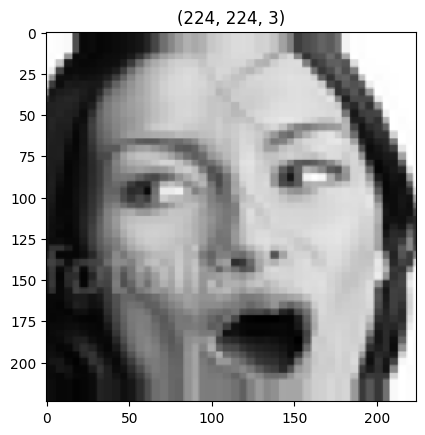

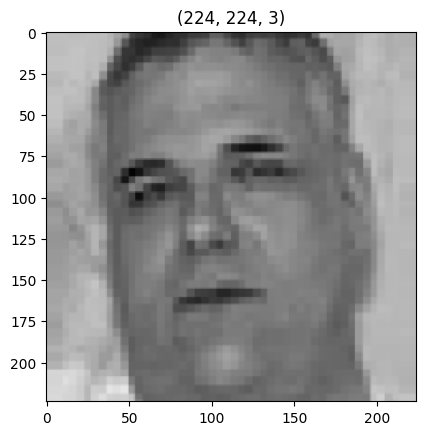

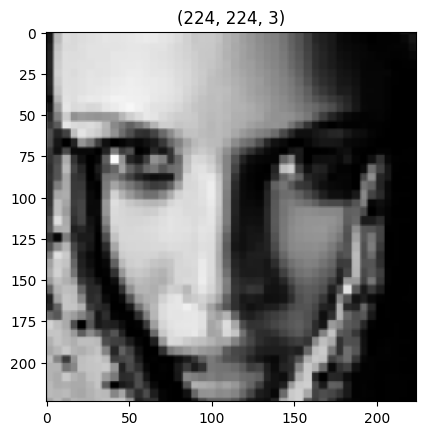

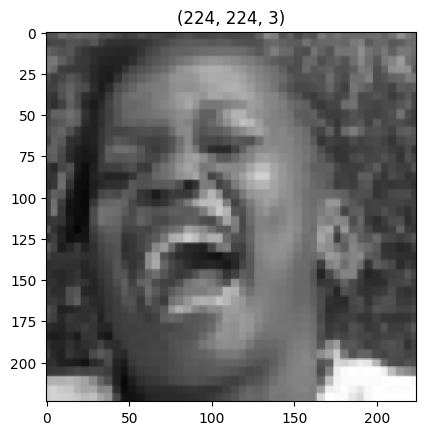

In [26]:
t_img, label = train_data.__next__()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)


#**Using MobileNet for its pre-trained weights**


In [27]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)



17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# **Creating our model.**


In [28]:
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

#**Training the model**

In [30]:
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=100,
    validation_data=val_data,
    validation_steps=10
)

Epoch 1/100


C:\Users\lohit ramaraju\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1958 - loss: 17.8103 - val_accuracy: 0.2937 - val_loss: 12.1218
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3076 - loss: 10.4109 - val_accuracy: 0.3313 - val_loss: 8.1976
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3443 - loss: 7.1050 - val_accuracy: 0.4219 - val_loss: 5.7441
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3164 - loss: 7.1659 - val_accuracy: 0.4187 - val_loss: 5.3021
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3674 - loss: 5.8030 - val_accuracy: 0.4406 - val_loss: 4.4418
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3990 - loss: 5.2531 - val_accuracy: 0.4250 - val_loss: 4.5724
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3740 - loss: 5.0634 - val_accuracy: 0.4563 - val_loss: 4.3059
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4782 - loss: 4.4742 - val_accuracy: 0.4219 - val_loss: 

c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3564 - loss: 6.7573 - val_accuracy: 0.3438 - val_loss: 5.9473
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4651 - loss: 5.9004 - val_accuracy: 0.4062 - val_loss: 6.1585
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4298 - loss: 5.9107 - val_accuracy: 0.3812 - val_loss: 6.9998
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3584 - loss: 6.9994 - val_accuracy: 0.3562 - val_loss: 7.9075
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3401 - loss: 7.5295 - val_accuracy: 0.4531 - val_loss: 6.3246
Epoch 18/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4134 - loss: 6.6166 - val_accuracy: 0.4594 - val_loss: 6.9728
Epoch 19/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4795 - loss: 5.7448 - val_accuracy: 0.3281 - val_loss: 8.7744
Epoch 20/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4087 - loss: 6.7566 - val_accuracy: 0.4250 - val_lo

#**Saving the built Model**

In [31]:
# Save the model in h5 format 
model.save('final_model_new.h5')

#**Train accuracy v/s Testing accuracy**

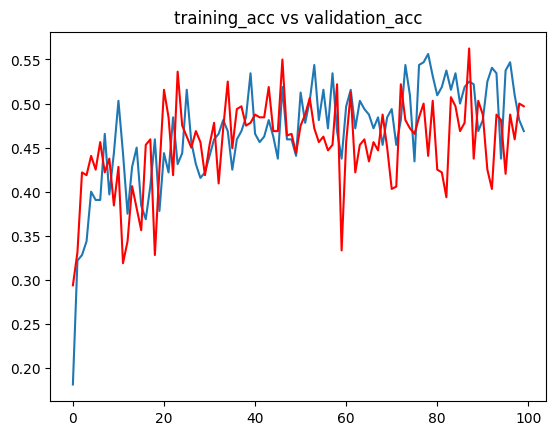

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("training_acc vs validation_acc")
plt.show()

#**Training Loss v/s Testing Loss**

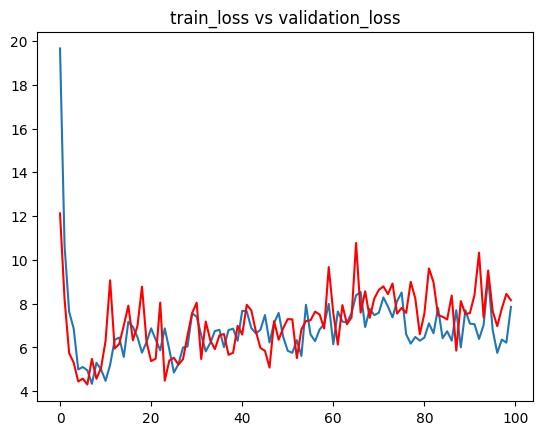

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("train_loss vs validation_loss")
plt.show()

# **Testing the model using images**

In [34]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
 the image is of anger


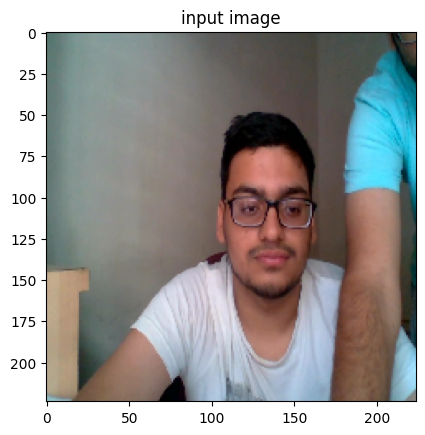

In [35]:
# path for the image to see if it predics correct class

path = r"C:\Users\lohit ramaraju\OneDrive\Desktop\IITJ\AI\Project\emotion-based-music-player\test.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()